# MANIA results for three subject
In the figure below, we look at : __Threshold, Density, Assymetry__. Their relationship together and the optimum operating point metrics. The results are shown for three subjects

In [1]:
# Environmental set up
from utils import *
import matplotlib.pyplot as plt
import pickle as pk
%matplotlib inline

In [2]:
# density, assymetry, threshold
d1,a1,t1 = basic_results("192273")
d2,a2,t2 = basic_results("206929")
d3,a3,t3 = basic_results("227533")
Z = num.zeros((3,3,len(d1)))
Z[0,0,:] = d1
Z[0,1,:] = a1
Z[0,2,:] = t1
Z[1,0,:] = d2
Z[1,1,:] = a2
Z[1,2,:] = t2
Z[2,0,:] = d3
Z[2,1,:] = a3
Z[2,2,:] = t3
L = ['Subject 192273','Subject 206929','Subject 227533']

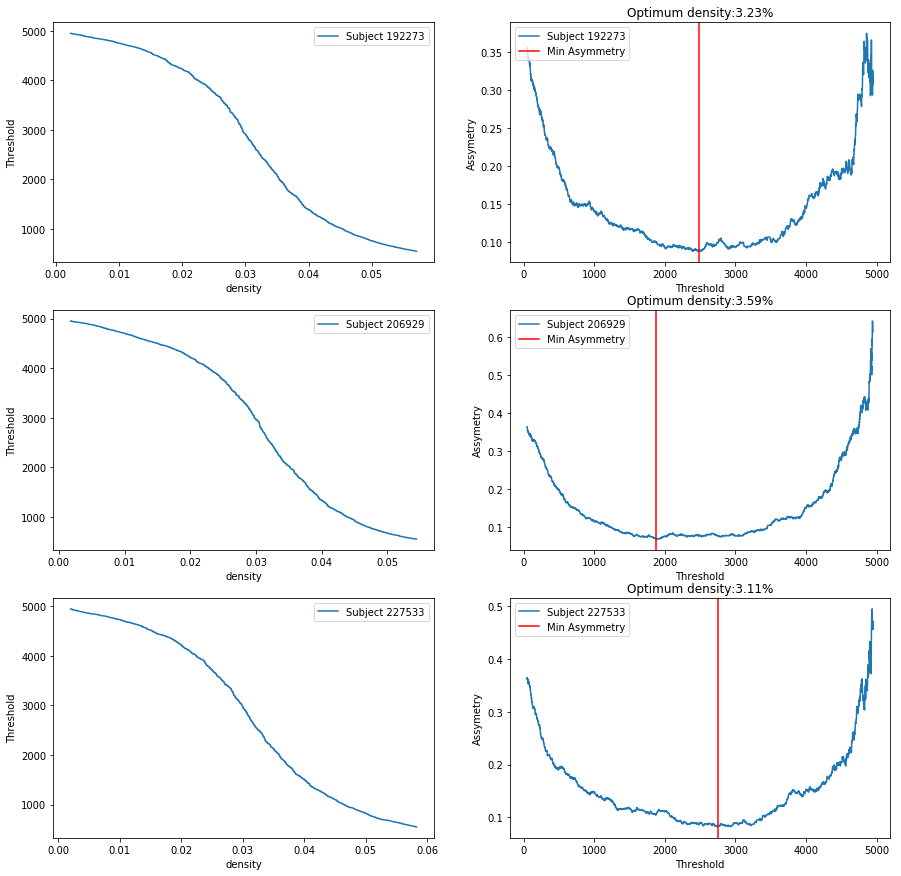

In [20]:
# Plotting the results
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        if j == 0:
            col.plot(Z[i,0,:][:-500],Z[i,2,:][:-500],label = L[i])
            col.set_xlabel('density')
            col.set_ylabel('Threshold')
            col.legend()
        else:
            col.plot(Z[i,2,:],Z[i,1,:],label = L[i])
            j = num.argmin(Z[i,1,:])
            col.axvline(Z[i,2,:][j],color='red',label = 'Min Asymmetry')
            col.set_xlabel('Threshold')
            col.set_ylabel('Assymetry')
            col.set_title('Optimum density:' + str(Z[i,0,j]*100)[0:4] + '%')
            col.legend(loc=2)

---

### /// Previous Results ///
# Distance vs Connection strength

> The follwoing analysis is for the seeds in ROI L1

First, we find all the seed that are strongly connected to any target ROIs, i.e., ```P(i,k)>T``` - ```k``` is the target ROI, ```i``` is the seed in ```L1```. I set ```T=2000``` for the analysis. According to following analysis there are two main target ROIs that have many of such seed ```L4``` and ```L121```.

In [1]:
# Environmental set up
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

[1, 88, 6, 2, 5, 17]



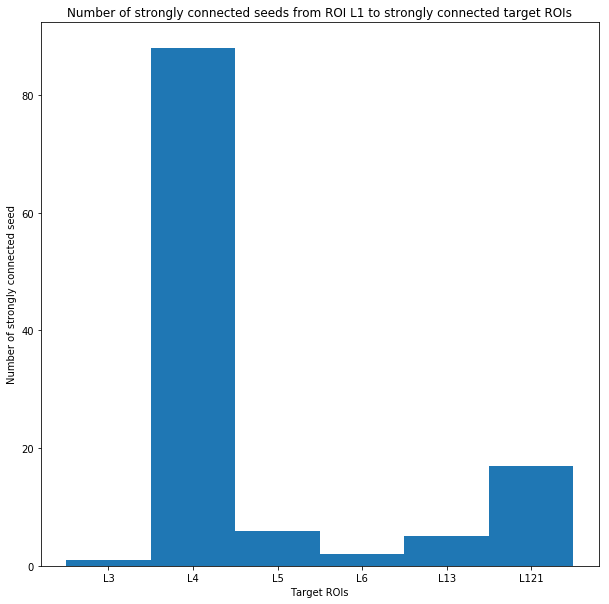

In [2]:
# Finding seed and target ROIs which are strongly connected to ROI L1
D = distanceBias()
targetROIs = D.keys()
numSeeds = [len(D[xx]) for xx in D]
print(numSeeds)
fig, ax = plt.subplots(figsize=(10,10))
ind = range(len(numSeeds))
ax.bar(ind , numSeeds, width = 1)
ax.set_ylabel('Number of strongly connected seed')
ax.set_xlabel('Target ROIs')
ax.set_title('Number of strongly connected seeds from ROI L1 to strongly connected target ROIs')
ax.set_xticks(ind)
ax.set_xticklabels(['L'+str(xx+1) for xx in targetROIs])
print()

### Distance vs connection strength plot
The figure below shows the distance vs connection strength for the two target ROIs ```L4``` and ```L121```.

Text(0.5,1,'Seeds in L1 to taget ROI L121')

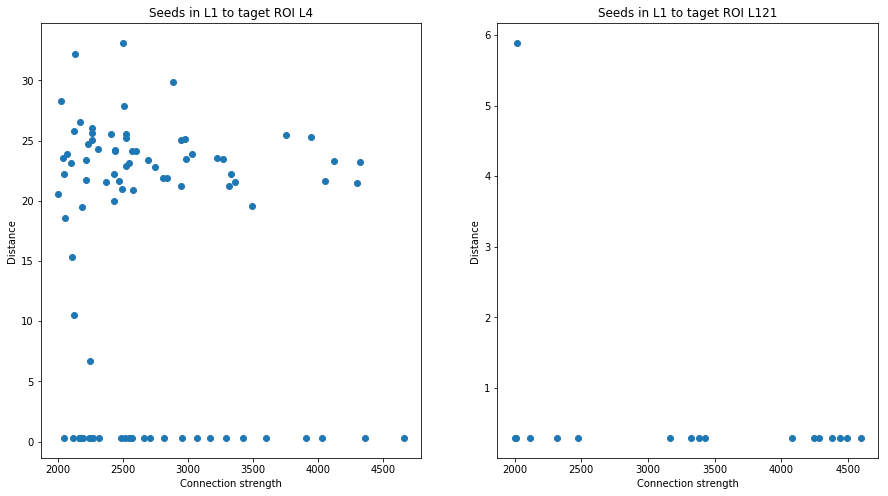

In [3]:
import math
l4 = D[3]
l121 = D[120]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
i = 0
ax[0].scatter([xx[0] for xx in l4],[xx[1] for xx in l4])
ax[0].set_xlabel('Connection strength')
ax[0].set_ylabel('Distance')
ax[0].set_title('Seeds in L1 to taget ROI L4')
ax[1].scatter([xx[0] for xx in l121],[xx[1] for xx in l121])
ax[1].set_xlabel('Connection strength')
ax[1].set_ylabel('Distance')
ax[1].set_title('Seeds in L1 to taget ROI L121')

> It seems that target ROI ```L121``` and ```L4``` are adjacent to ```L1```, and that is why they contianed most of the strongly connected seeds. 

---

//// Past ///

# ROI to ROI Distance

> The sample results in this sections are all from seeds in ROI L1 and subject 1881(L for left hemisphere and 1 is the ROI identifier). Also all analysis as discussed previously are done seperately per hemisphere.

Since in MANIA 2.0, we are proposing a distance correction the first step is to define the distance metric itself. The starting point to define such a metric is $A_i(j,k)$ i.e., the distance of seed $j$ in ROI $i$ from target ROI $k$. First we analyze the $A_i(j,k)$ for pair $i=0,k=3$, the connection strength of these pairs are very strong (4665 conncting streamlines out of 5000)

| Seed ROI | Target ROI | Number of connecting streamlines (strongest connection) |
|--- | --- | --- |
|L1 | L4 | 4665/5000 |

In [4]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
L = readS2R_L() # Read all distances
L = L[:,3]; # Get strongest connected ROI distances (L1 to L4) - python indecies start from 0
L = L.flatten()
L = L[num.nonzero(L)] # Get distances from all connected seeds
# some statistics for seed to target ROI distance from L1 to L4
print("Mean Distance:%8.2f" % num.mean(L))
print("Median Distance:%8.2f"%num.median(L))
print("Min Distance:%8.2f"%num.min(L))
print("Max Distance:%8.2f"%num.max(L))

Mean Distance:   23.30
Median Distance:   24.34
Min Distance:    0.30
Max Distance:   51.90


### Distance PDF
Figure below illustrate the PDF of distances (from all seeds of L1 to target ROI L4)

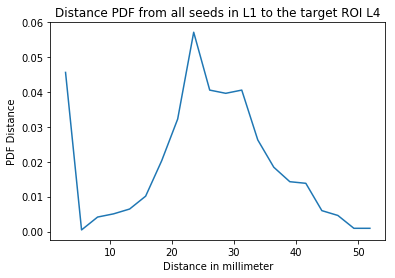

In [5]:
y,x = pdf(L)
plt.plot(x,y)
plt.xlabel("Distance in millimeter")
plt.ylabel("PDF Distance")
plt.title("Distance PDF from all seeds in L1 to the target ROI L4")
print()

# What Distance metric?
### Mean/ Mediam or strongest connection distance
The above analysis was repeated for 9 random target ROIs from R1. PDF of these distance are plotted below. Also in these plots you can see:
1. Mean distance
2. Median distance
3. Distance from the strongest connected seed

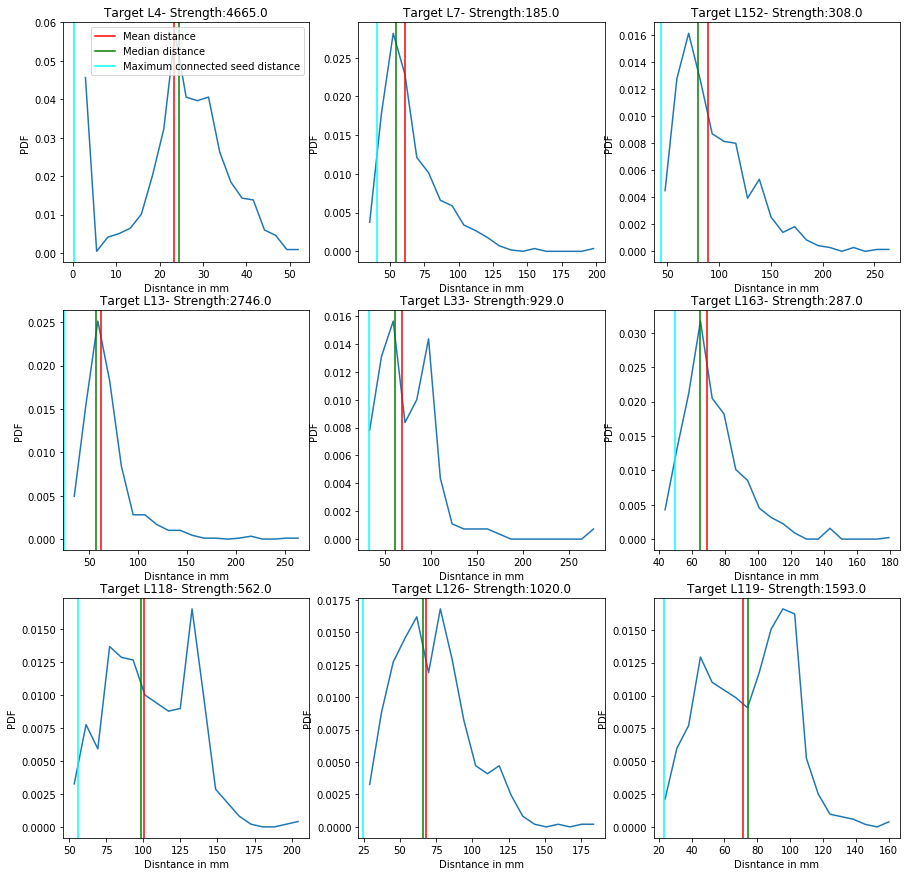

In [6]:
D,X,C,Z = randomDisPDF()
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0
for row in ax:
    for col in row:
        col.plot(X[i,:],D[i,:])
        col.set_xlabel("Disntance in mm")
        col.set_ylabel("PDF")
        col.set_title("Target L"+str(int(C[i][0])) + "- Strength:" +str(C[i][1]))
        col.axvline(Z[i][0], color="red",label='Mean distance')
        col.axvline(Z[i][1], color="green",label='Median distance')
        col.axvline(Z[i][2], color="cyan",label='Maximum connected seed distance')
        if i == 0:
            col.legend()
        i = i + 1

> The strongest connected seed is always **much closer** to the target ROI.

In [3]:
hdf = read_hdf('all.h5','sub/L1/p')

TypeError: cannot create a storer if the object is not existing nor a value are passed